<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoder,-StandardScaler,-разбиение-на-выбороки" data-toc-modified-id="One-Hot-Encoder,-StandardScaler,-разбиение-на-выбороки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>One Hot Encoder, StandardScaler, разбиение на выбороки</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#AUC-ROC" data-toc-modified-id="AUC-ROC-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>AUC-ROC</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Пропуски в столбце Tenure, их 9%. Не вижу варинта заменить их на какое нибуть значение, так как есть варинт что просто не были заполнены данные (забыли), заполнить медианным значением нельзя, будет переобучение модели. Остается вариант удалить, так как таких значений достаточно мало. 

In [6]:
df = df.dropna(subset=['Tenure'])
df['Tenure'] = df['Tenure'].astype('int')
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Решила удалить данные столбцы, они не нужны для обучения моделей, не влияют на результат.
#Ну и с ними логическая модель совсем не работает, выдает 0. 
name = ['RowNumber','CustomerId','Surname']
df = df.drop(name, axis=1)

## Исследование задачи

0    7237
1    1854
Name: Exited, dtype: int64

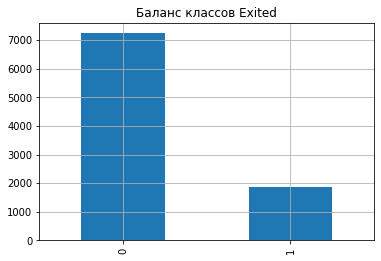

In [8]:
#дисбаланс
df['Exited'].value_counts().plot(kind='bar',grid=True)
plt.title('Баланс классов Exited')
df['Exited'].value_counts()

Как видно, классы являются несбалансированными, поскольку делятся примерно в соотношении 80% и 20% (4:1). 

### One Hot Encoder, StandardScaler, разбиение на выбороки

Признаки:
* RowNumber  -          категориальный
* CustomerId -          категориальный
* Surname    -          категориальный
* CreditScore-          колличественный
* Geography  -          категориальный
* Gender     -          категориальный
* Age        -          колличественный
* Tenure     -          колличественный
* Balance    -          колличественный
* NumOfProducts -       колличественный
* HasCrCard      -      категориальный
* IsActiveMember  -     категориальный
* EstimatedSalary  -    колличественный
* Exited            -   целевой признак

Переведем все категориальные признаки в численные методом One Hot Encoder. 

In [9]:
df_OHE = pd.get_dummies(df,drop_first=True)
df_OHE

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   int64  
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 852.3+ KB


In [11]:
target = df_OHE['Exited']
features = df_OHE.drop(['Exited'] , axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)
print(f"Количество строк в features_train: {features_train.shape}")
print(f"Количество строк в target_train: {target_train.shape}")

Количество строк в features_train: (5454, 11)
Количество строк в target_train: (5454,)


In [12]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)
print(f"Количество строк в features_test: {features_test.shape}")
print(f"Количество строк в features_valid: {features_valid.shape}")
print(f"Количество строк в target_test: {target_test.shape}")
print(f"Количество строк в target_valid: {target_valid.shape}")

Количество строк в features_test: (1818, 11)
Количество строк в features_valid: (1819, 11)
Количество строк в target_test: (1818,)
Количество строк в target_valid: (1819,)


In [14]:
#маштабирование признаков
warnings.filterwarnings('ignore')
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проведена предоработка данных. Сначала избавились от категориальных признаков методом OHE, затем рабили датасет на 3 выборки: обучающая, валидационая и тестовая. И дальше провели маштабирование признаков методом StandardScaler.

# Исследуем моделей

### DecisionTreeClassifier

In [76]:
%%time
best_model_DTC = None
best_f1_DTC = 0
best_depth_DTC = 0
list_valid = []
for i in tqdm(range(1, 22)):
    model_DTC = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model_DTC.fit(features_train, target_train)
    predictions_valid_DTC  = model_DTC.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid_DTC)
    list_valid.append(f1)
    if f1 > best_f1_DTC:
        best_model_DTC = model_DTC
        best_f1_DTC = f1
        best_depth_DTC = i
print("F1-мера на валидационной выборке:", best_f1_DTC, 
      "Максимальная глубина:", best_depth_DTC)

100%|██████████| 21/21 [00:00<00:00, 46.33it/s]

F1-мера на валидационной выборке: 0.557659208261618 Максимальная глубина: 7
CPU times: user 437 ms, sys: 11.6 ms, total: 449 ms
Wall time: 457 ms


### RandomForestClassifier

In [77]:
best_model_RFC = None
best_f1_RFC = 0
best_est_RFC = 0
best_depth_RFC = 0
for est in tqdm(range(1, 20)):
    for depth in range (1,22):
        model_RFC = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_RFC.fit(features_train, target_train) 
        predictions_valid_RFC = model_RFC.predict(features_valid)
        f1_RFC = f1_score(target_valid, predictions_valid_RFC) 
        if f1_RFC > best_f1_RFC:
            best_model_RFC = model_RFC
            best_f1_RFC = f1_RFC
            best_est_RFC = est
            best_depth_RFC = depth 
print("F1-мера на валидационной выборке:", best_f1_RFC, 
      "Количество деревьев:", best_est_RFC, "Максимальная глубина:", best_depth_RFC)

100%|██████████| 19/19 [00:21<00:00,  1.13s/it]

F1-мера на валидационной выборке: 0.5831903945111492 Количество деревьев: 16 Максимальная глубина: 10


### LogisticRegression

In [78]:
%%time
model_LR = LogisticRegression(random_state=12345, solver='liblinear')
model_LR.fit(features_train, target_train) 
predictions_valid_LR = model_LR.predict(features_valid) 
f1_LR = f1_score(target_valid, predictions_valid_LR)
print("F1-мера на валидационной выборке:", f1_LR)

F1-мера на валидационной выборке: 0.35203094777562866
CPU times: user 23.7 ms, sys: 11.9 ms, total: 35.6 ms
Wall time: 22.2 ms


Без учета дисбаланса выходит значения F1 следующие: 
*  DecisionTreeClassifier = 0.56
*  RandomForestClassifier = 0.58
*  LogisticRegression = 0.35

## Борьба с дисбалансом

In [79]:
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=12345)
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 
f1 = f1_score(target_valid, predictions_valid_LR)
print("F1-мера на валидационной выборке:", f1)

F1-мера на валидационной выборке: 0.35203094777562866


In [80]:
best_f1_DTC = 0
best_depth_DTC = 0
list_valid = []
for i in tqdm(range(1, 22)):
    model_DTC = DecisionTreeClassifier(max_depth=i, class_weight='balanced', random_state=12345)
    model_DTC.fit(features_train, target_train)
    predictions_valid_DTC  = model_DTC.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid_DTC)
    list_valid.append(f1)
    if f1 > best_f1_DTC:
        best_model_DTC = model_DTC
        best_f1_DTC = f1
        best_depth_DTC = i
print("F1-мера на валидационной выборке:", best_f1_DTC, 
      "Максимальная глубина:", best_depth_DTC)

100%|██████████| 21/21 [00:00<00:00, 46.97it/s]

F1-мера на валидационной выборке: 0.5675675675675674 Максимальная глубина: 8


In [81]:
best_model_RFC = None
best_f1_RFC = 0
best_est_RFC = 0
best_depth_RFC = 0
for est in tqdm(range(1, 20)):
    for depth in range (1,22):
        model_RFC = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est, max_depth=depth) 
        model_RFC.fit(features_train, target_train) 
        predictions_valid_RFC = model_RFC.predict(features_valid)
        f1_RFC = f1_score(target_valid, predictions_valid_RFC) 
        if f1_RFC > best_f1_RFC:
            best_model_RFC = model_RFC
            best_f1_RFC = f1_RFC
            best_est_RFC = est
            best_depth_RFC = depth 
print("F1-мера на валидационной выборке:", best_f1_RFC, 
      "Количество деревьев:", best_est_RFC, "Максимальная глубина:", best_depth_RFC)

100%|██████████| 19/19 [00:21<00:00,  1.14s/it]

F1-мера на валидационной выборке: 0.6084337349397592 Количество деревьев: 17 Максимальная глубина: 12


Добавив class_weight='balanced', на результат не повлияло сильно, хоть и стало учитывать во сколько раз 0 больше чем 1.
   
   Было: 
*  DecisionTreeClassifier = 0.56
*  RandomForestClassifier = 0.58
*  LogisticRegression = 0.35
   
   Стало: 
*  DecisionTreeClassifier = 0.57
*  RandomForestClassifier = 0.608
*  LogisticRegression = 0.35

Поэтому применим метод upsampling. 

In [82]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [83]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Увеличила в features_train и target_train выборки где в целевом признаки встречаются 1 в 4 раза, чтобы убрать дисбаланс.

### DecisionTreeClassifier

In [84]:
%%time
best_model_DTC_upsampled = None
best_f1_DTC_upsampled = 0
best_depth_DTC_upsampled = 0
list_valid = []
for i in tqdm(range(1, 22)):
    model_DTC_upsampled = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model_DTC_upsampled.fit(features_upsampled, target_upsampled)
    predictions_valid_DTC_upsampled  = model_DTC_upsampled.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid_DTC_upsampled)
    list_valid.append(f1)
    if f1 > best_f1_DTC_upsampled:
        best_model_DTC_upsampled = model_DTC_upsampled
        best_f1_DTC_upsampled = f1
        best_depth_DTC_upsampled = i
print("F1-мера на валидационной выборке:", best_f1_DTC_upsampled, 
      "Максимальная глубина:", best_depth_DTC_upsampled)

100%|██████████| 21/21 [00:00<00:00, 37.43it/s]

F1-мера на валидационной выборке: 0.5711060948081264 Максимальная глубина: 8
CPU times: user 555 ms, sys: 4 ms, total: 559 ms
Wall time: 563 ms


### RandomForestClassifier

In [85]:
best_model_RFC_upsampled = None
best_f1_RFC_upsampled = 0
best_est_RFC_upsampled = 0
best_depth_RFC_upsampled = 0
for est in tqdm(range(1, 20)):
    for depth in range (1,22):
        model_RFC = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_RFC.fit(features_upsampled, target_upsampled) 
        predictions_valid_RFC = model_RFC.predict(features_valid)
        f1_RFC = f1_score(target_valid, predictions_valid_RFC) 
        if f1_RFC > best_f1_RFC_upsampled:
            best_model_RFC_upsampled = model_RFC
            best_f1_RFC_upsampled = f1_RFC
            best_est_RFC_upsampled = est
            best_depth_RFC_upsampled = depth 
print("F1-мера на валидационной выборке:", best_f1_RFC_upsampled, 
      "Количество деревьев:", best_est_RFC_upsampled, "Максимальная глубина:", best_depth_RFC_upsampled)

100%|██████████| 19/19 [00:31<00:00,  1.63s/it]

F1-мера на валидационной выборке: 0.6177285318559558 Количество деревьев: 17 Максимальная глубина: 13


### LogisticRegression

In [86]:
%%time
model_LR_upsampled = LogisticRegression(random_state=12345, solver='liblinear')
model_LR_upsampled.fit(features_upsampled, target_upsampled) 
predictions_valid_LR_upsampled = model_LR_upsampled.predict(features_valid) 
f1_LR_upsampled = f1_score(target_valid, predictions_valid_LR_upsampled)
print("F1-мера на валидационной выборке:", f1_LR_upsampled)

F1-мера на валидационной выборке: 0.5042816365366317
CPU times: user 51.4 ms, sys: 36 ms, total: 87.4 ms
Wall time: 35.6 ms


Итог в значениях F1:
*  DecisionTreeClassifier = 0.57
*  RandomForestClassifier = 0.617
*  LogisticRegression = 0.504

Хоть и не на много, но видно увеличение в показателе у модели RandomForestClassifier. Она и буде для нас являться лучшей моделью для предсказания. 

## Тестирование модели

Проверим качество модели на тестовой выборке.

In [87]:
best_model_RFC_upsampled

RandomForestClassifier(max_depth=13, n_estimators=17, random_state=12345)

In [88]:
predictions_test_RFC_upsampled = best_model_RFC_upsampled.predict(features_test)

In [89]:
print('Лучшая модель случайный лес: ', f1_score(target_test, predictions_test_RFC_upsampled))

Лучшая модель случайный лес:  0.6236559139784946


Показатель стал еще больше, был 0.617

### AUC-ROC

In [90]:
probabilities = best_model_RFC_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8305637667346727

In [91]:
probabilities_DTC = best_model_DTC_upsampled.predict_proba(features_valid)
probabilities_one_valid__DTC = probabilities_DTC[:,1]
fpr_DTC, tpr_DTC, thresholds_DTC = roc_curve(target_valid, probabilities_one_valid__DTC)

auc_roc_DTC = roc_auc_score(target_valid, probabilities_one_valid__DTC)
auc_roc_DTC

0.8083321543982964

In [92]:
probabilities_LR = model_LR_upsampled.predict_proba(features_valid)
probabilities_one_valid_LR = probabilities_LR[:,1]
fpr_LR, tpr_LR, thresholds_LR = roc_curve(target_valid, probabilities_one_valid_LR)

auc_roc_LR = roc_auc_score(target_valid, probabilities_one_valid_LR)
auc_roc_LR

0.7781846137808819

<Figure size 432x288 with 0 Axes>

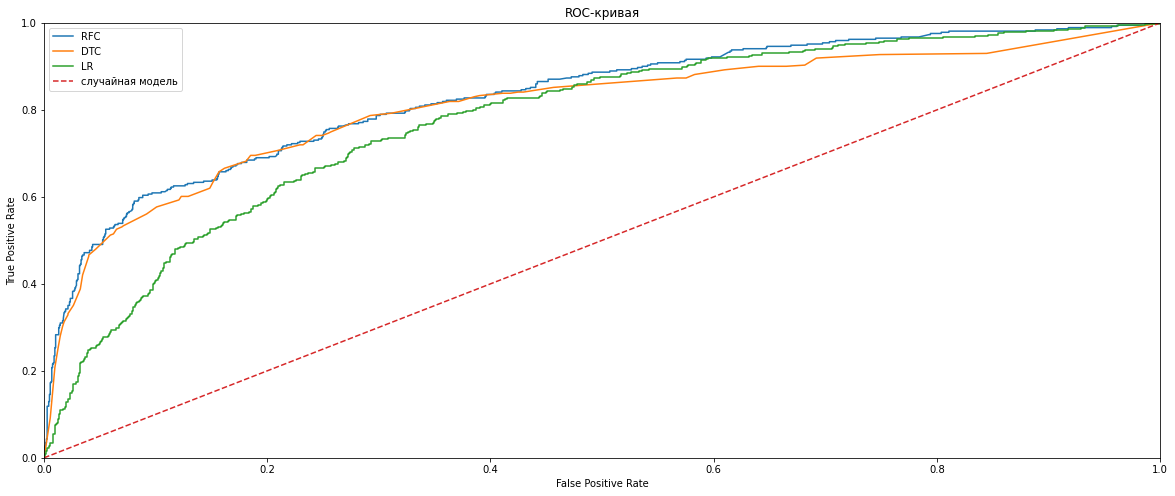

In [93]:
plt.figure()
plt.figure(figsize=(20,8))
plt.plot(fpr,tpr)
plt.plot(fpr_DTC,tpr_DTC)
plt.plot(fpr_LR,tpr_LR)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(('RFC', 'DTC', 'LR', 'случайная модель'))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

У нашей лучшей модели самая большая площадь, по графигу видно что доганяет по значениям DTC. Так же наша модель на много лучше случайной, у нашей 0.83 площадь, а у случайной 0,5. Итог: подтвердилось , что у нашей лучшей модели самое высокое качество. 

Спасибо за проверку, изучила( доизучаю еще) все комментарии, график подписала и добавила вывод.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*